### Motivation

To demonstrate how ICM cells are automatically classified in this study using the relative levels of GATA6 and NANOG as variables. 
I first use Hierarchical Clustering to classify ICM cells of reference embryos from [Saiz et al (2016)](https://doi.org/10.1038/ncomms13463) and compare the result to the original one, using K-means Clustering. Next I show how I applied Hierarchical Clustering to classify ICM cells in embryos of the current dataset

Load necessary packages, source the plotting aesthetics object and set the working directory to the main project folder, not the notebooks

In [3]:
library('ggplot2')
library('reshape2')
library('plyr')
library('dplyr')

source('../src/plotting-aes.R')

setwd('../')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Read in the Nature Communications dataset from the interim folder, and if not present, generate using ```all-lms_read.R```. 
Select embryos of 32 or more cells (blastocysts) and order the developmental stage variable

In [9]:
exists('ncoms.lms')

[1] TRUE

In [10]:
if(exists('ncoms.lms') == F) {
    ncoms.lms <- read.csv('./data/interim/ncoms-lms-tidy.csv')
}

if(exists('ncoms.lms') == F) {
  source('./src/data/all-lms_read.R')
}

ncoms.lms$Stage <- factor(ncoms.lms$Stage, levels = c('32_64', '64_90', '90_120', '120_150', '>150'))

Re-scale NANOG and GATA6 levels to 0-1 for each litter, for classification purposes, as has been done for the present study

In [11]:
ncoms.lms <- split(ncoms.lms, as.factor(ncoms.lms$Experiment))
for(l in 1:length(ncoms.lms)) { 
  ncoms.lms[[l]]$CH4.ebLogCor.l <- ncoms.lms[[l]]$CH4.ebLogCor / 
    max(ncoms.lms[[l]]$CH4.ebLogCor)
  ncoms.lms[[l]]$CH5.ebLogCor.l <- ncoms.lms[[l]]$CH5.ebLogCor / 
    max(ncoms.lms[[l]]$CH5.ebLogCor)
}
ncoms.lms <- do.call(rbind, ncoms.lms)

Split data into two objects, ```te``` (containing TE cells) and ```icm``` (containing ICM cells)

In [22]:
te <- subset(ncoms.lms, TE_ICM == 'TE')
icm <- subset(ncoms.lms, TE_ICM == 'ICM')

Assign TE to a dummy cluster 0 and impose a 'TE' identity on them, as they have already been classified. Use the ```hclust()``` function to do Hierarchical Clustering on ICM cells using Channel 4 (GATA6 in this dataset) and Channel 5 (NANOG in this dataset) as variables and UPGMA as method (method = 'average')

In [23]:
te$id.cluster <- 0
te$Identity.hc <- 'TE'

my.clusters <- hclust(dist(data.frame(icm$CH4.ebLogCor.l, 
                                      icm$CH5.ebLogCor.l)), 
                      method = 'average')

Display the resulting dendrogram

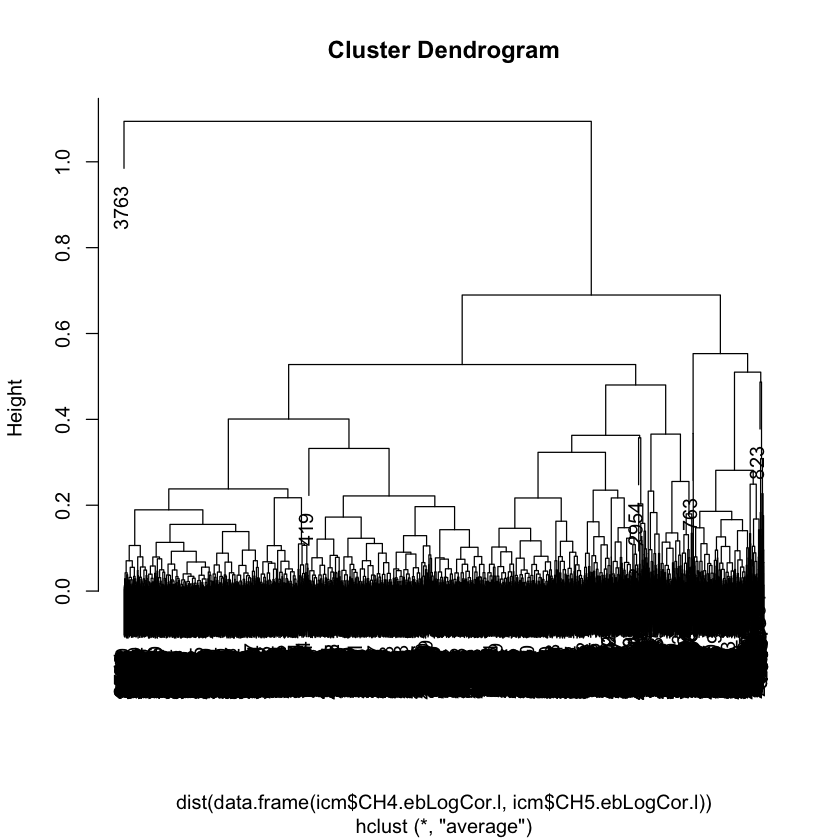

In [14]:
plot(my.clusters)

Cut the dendrogram at sequential levels, from 4 clusters (the minimal number of clusters we expect (EPI, PrE, DP and NANOG.lo EPI cells), up to 15 clusters, to see how much does it make sense to break up the population.  
For each instance, generate a table comparing the correspondence between the clusters generated and the original identities assigned using K-means Clustering (DN, DP, EPI, PRE, TE across the top).

   
      TE  PRE   DP  EPI   DN
  1    0 1099 1433  860  300
  2    0  435    0    0   23
  3    0    0    0    0    4
  4    0    0    0    0    1


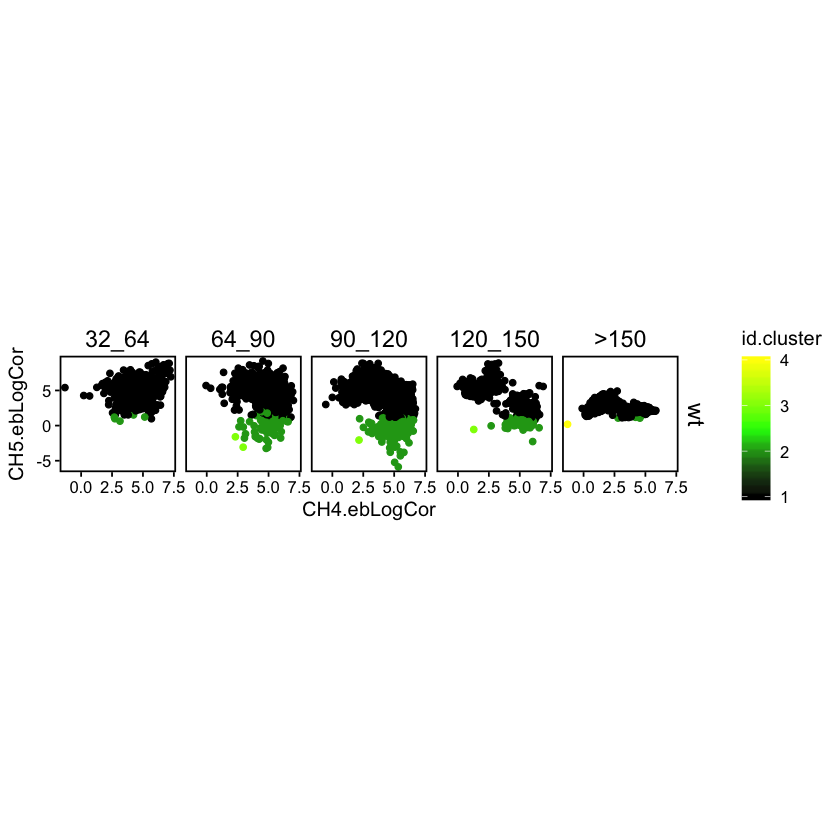

   
      TE  PRE   DP  EPI   DN
  1    0 1061 1258   28   10
  2    0   38  175  832  290
  3    0  435    0    0   23
  4    0    0    0    0    4
  5    0    0    0    0    1


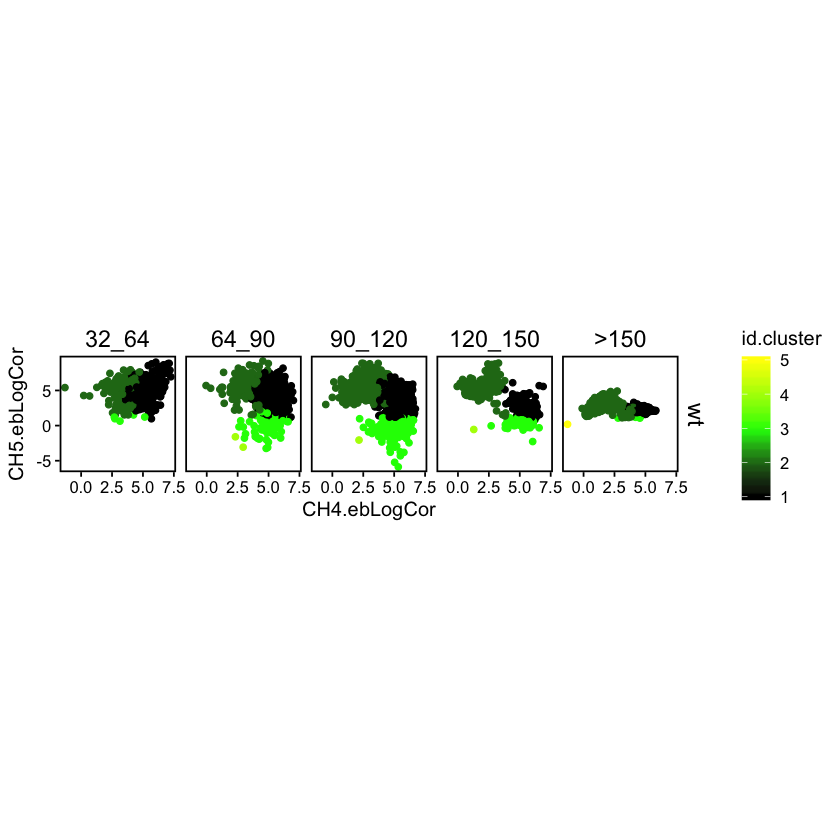

   
      TE  PRE   DP  EPI   DN
  1    0 1061 1258   28   10
  2    0   38  175  832  290
  3    0  408    0    0   23
  4    0    0    0    0    4
  5    0   27    0    0    0
  6    0    0    0    0    1


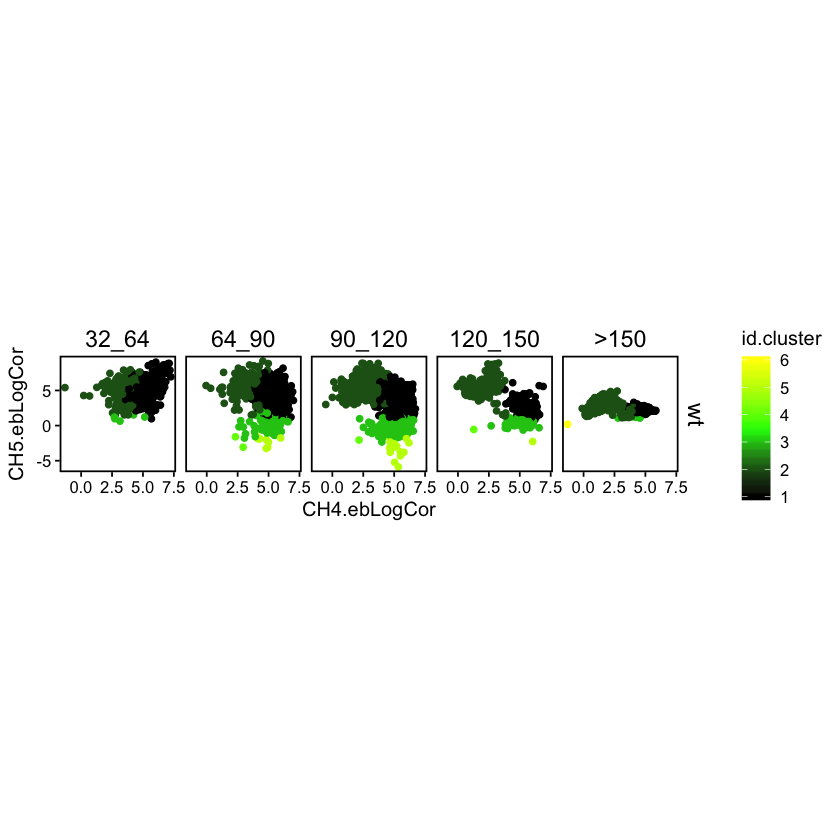

   
      TE  PRE   DP  EPI   DN
  1    0 1061 1258   28   10
  2    0   38  175  832  290
  3    0  408    0    0   23
  4    0    0    0    0    4
  5    0   26    0    0    0
  6    0    1    0    0    0
  7    0    0    0    0    1


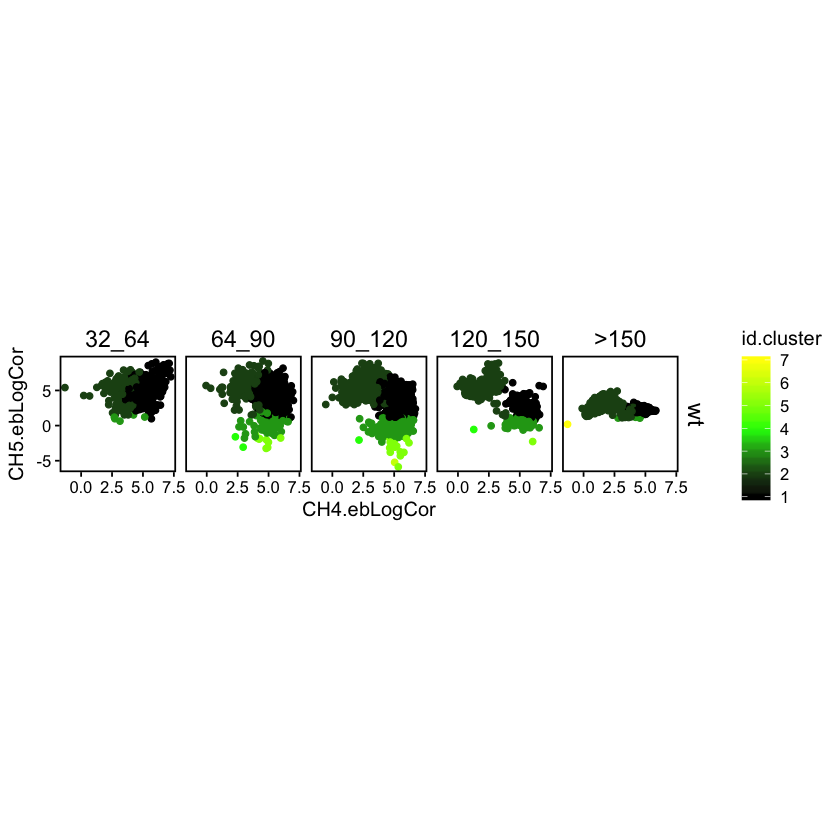

   
      TE  PRE   DP  EPI   DN
  1    0 1061 1258   28   10
  2    0    0  175  816   53
  3    0  408    0    0   23
  4    0   38    0   16  237
  5    0    0    0    0    4
  6    0   26    0    0    0
  7    0    1    0    0    0
  8    0    0    0    0    1


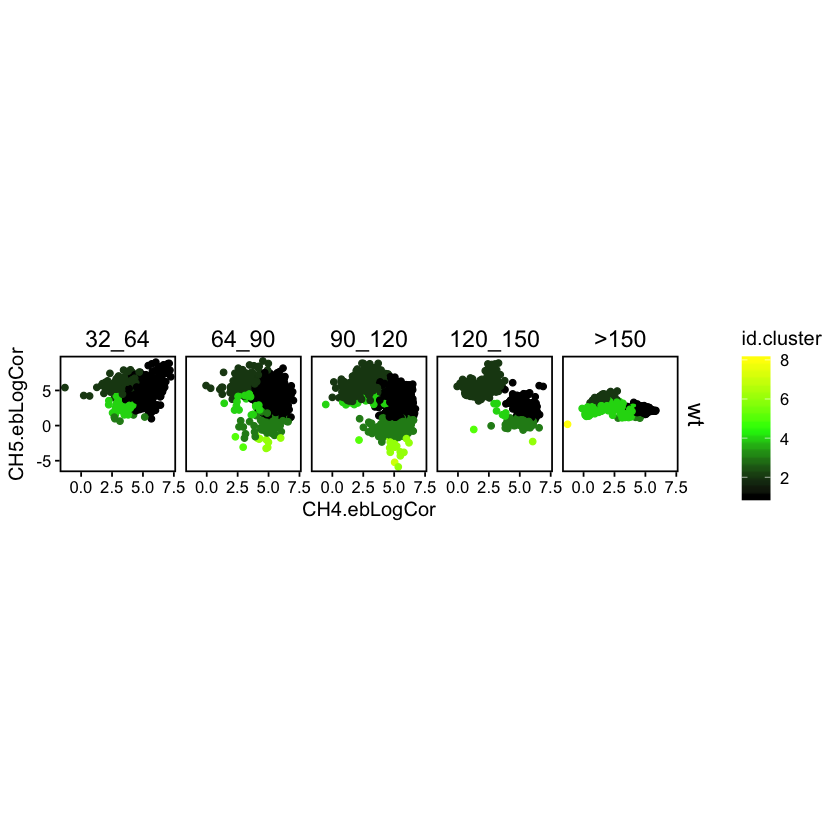

   
      TE  PRE   DP  EPI   DN
  1    0 1026  161    3    9
  2    0   35 1097   25    1
  3    0    0  175  816   53
  4    0  408    0    0   23
  5    0   38    0   16  237
  6    0    0    0    0    4
  7    0   26    0    0    0
  8    0    1    0    0    0
  9    0    0    0    0    1


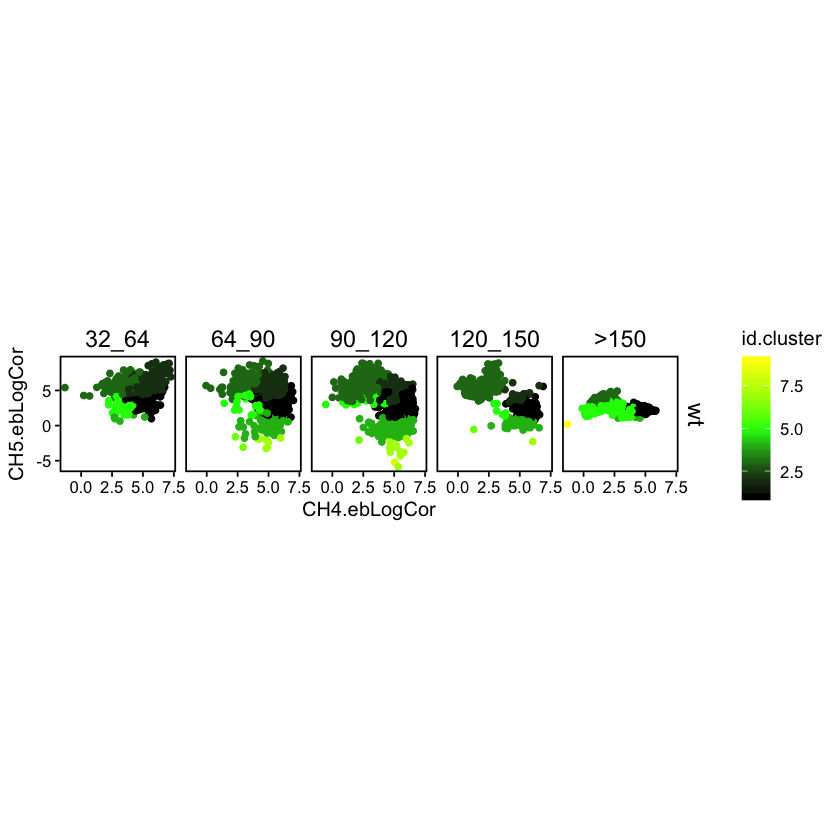

    
       TE  PRE   DP  EPI   DN
  1     0 1026  161    3    9
  2     0   35 1097   25    1
  3     0    0  175  816   53
  4     0  408    0    0   23
  5     0   38    0   16  237
  6     0    0    0    0    1
  7     0   26    0    0    0
  8     0    1    0    0    0
  9     0    0    0    0    3
  10    0    0    0    0    1


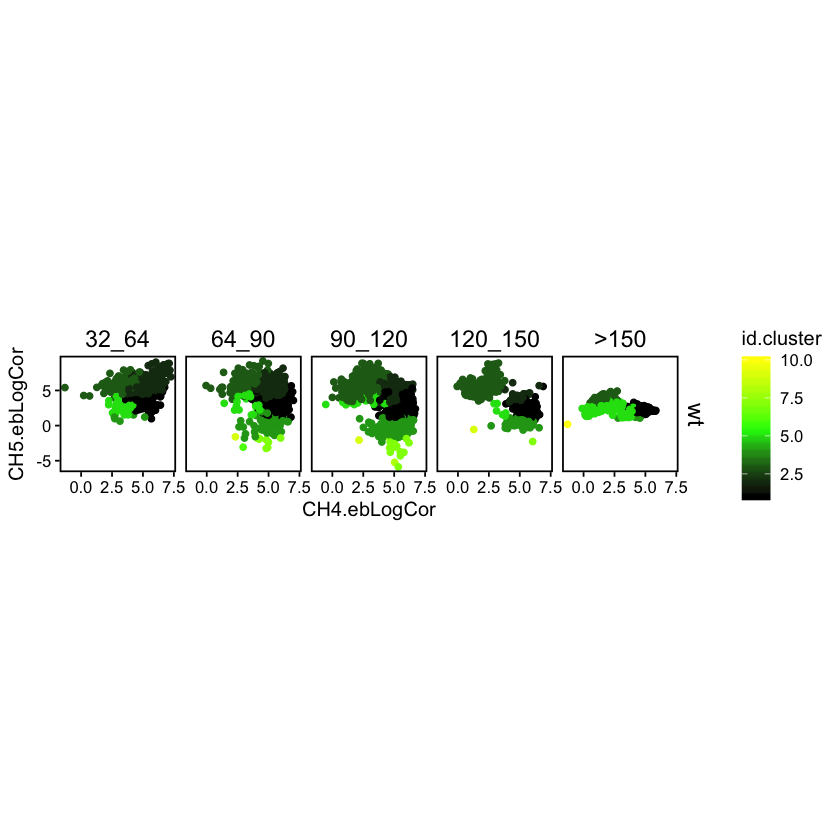

    
       TE  PRE   DP  EPI   DN
  1     0 1026  161    3    9
  2     0   35 1097   25    1
  3     0    0  175  816   53
  4     0  408    0    0   23
  5     0    0    0    0   82
  6     0   38    0   16  155
  7     0    0    0    0    1
  8     0   26    0    0    0
  9     0    1    0    0    0
  10    0    0    0    0    3
  11    0    0    0    0    1


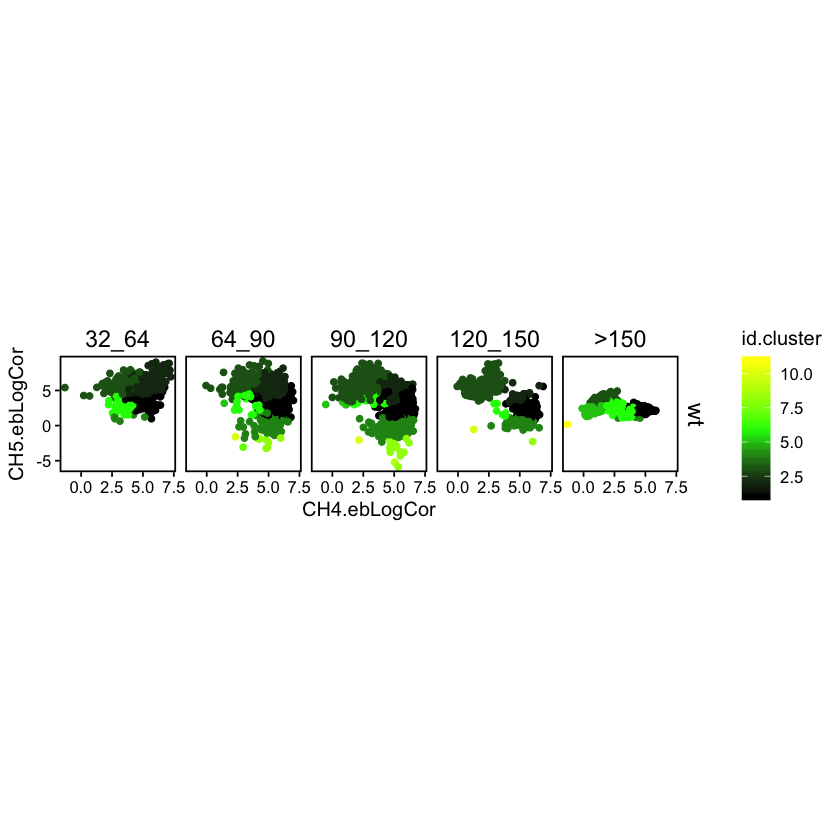

    
       TE  PRE   DP  EPI   DN
  1     0 1026  161    3    9
  2     0   35 1097   25    1
  3     0    0  175  754   53
  4     0  408    0    0   23
  5     0    0    0    0   82
  6     0   38    0   16  155
  7     0    0    0    0    1
  8     0   26    0    0    0
  9     0    0    0   62    0
  10    0    1    0    0    0
  11    0    0    0    0    3
  12    0    0    0    0    1


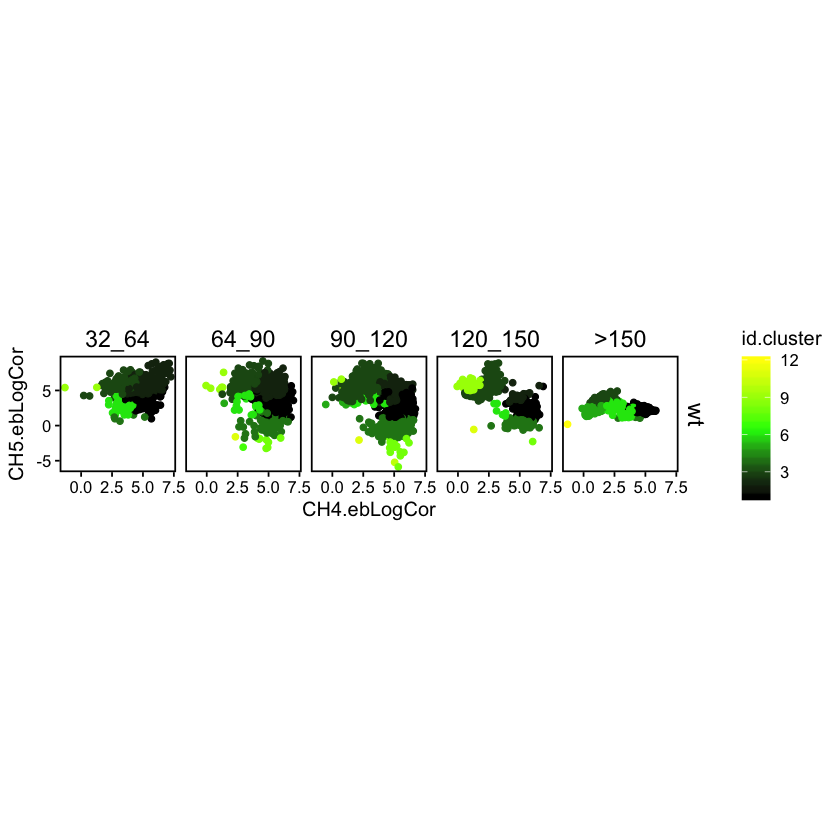

    
       TE  PRE   DP  EPI   DN
  1     0 1026  161    3    9
  2     0   35 1097   25    1
  3     0    0  175  754   53
  4     0  408    0    0   23
  5     0    0    0    0   82
  6     0   38    0   16  155
  7     0    0    0    0    1
  8     0   26    0    0    0
  9     0    0    0   61    0
  10    0    1    0    0    0
  11    0    0    0    0    3
  12    0    0    0    1    0
  13    0    0    0    0    1


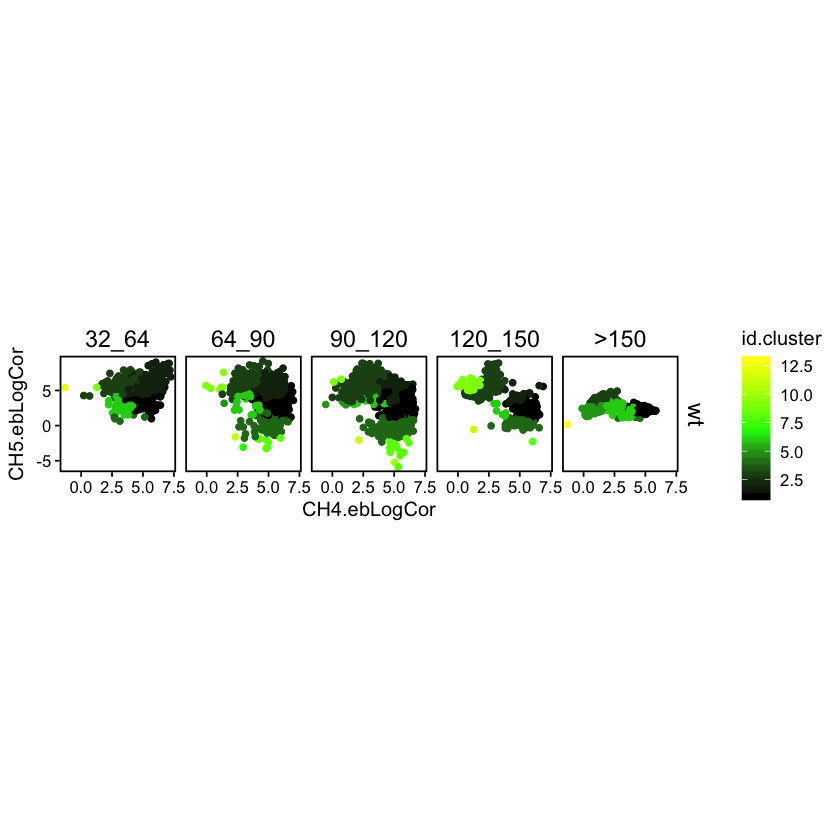

    
       TE  PRE   DP  EPI   DN
  1     0 1026  161    3    9
  2     0   35 1096   25    1
  3     0    0  175  754   53
  4     0  408    0    0   23
  5     0    0    0    0   82
  6     0    0    1    0    0
  7     0   38    0   16  155
  8     0    0    0    0    1
  9     0   26    0    0    0
  10    0    0    0   61    0
  11    0    1    0    0    0
  12    0    0    0    0    3
  13    0    0    0    1    0
  14    0    0    0    0    1


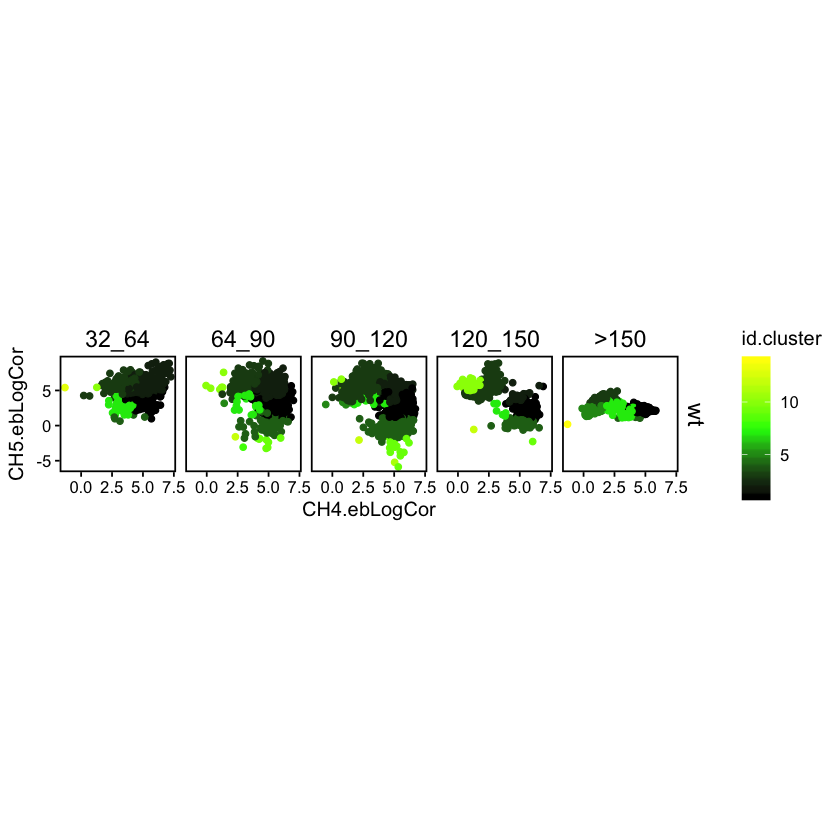

    
       TE  PRE   DP  EPI   DN
  1     0 1026  161    3    9
  2     0   35 1096   25    1
  3     0    0  166  462    0
  4     0  408    0    0   23
  5     0    0    9  292   53
  6     0    0    0    0   82
  7     0    0    1    0    0
  8     0   38    0   16  155
  9     0    0    0    0    1
  10    0   26    0    0    0
  11    0    0    0   61    0
  12    0    1    0    0    0
  13    0    0    0    0    3
  14    0    0    0    1    0
  15    0    0    0    0    1


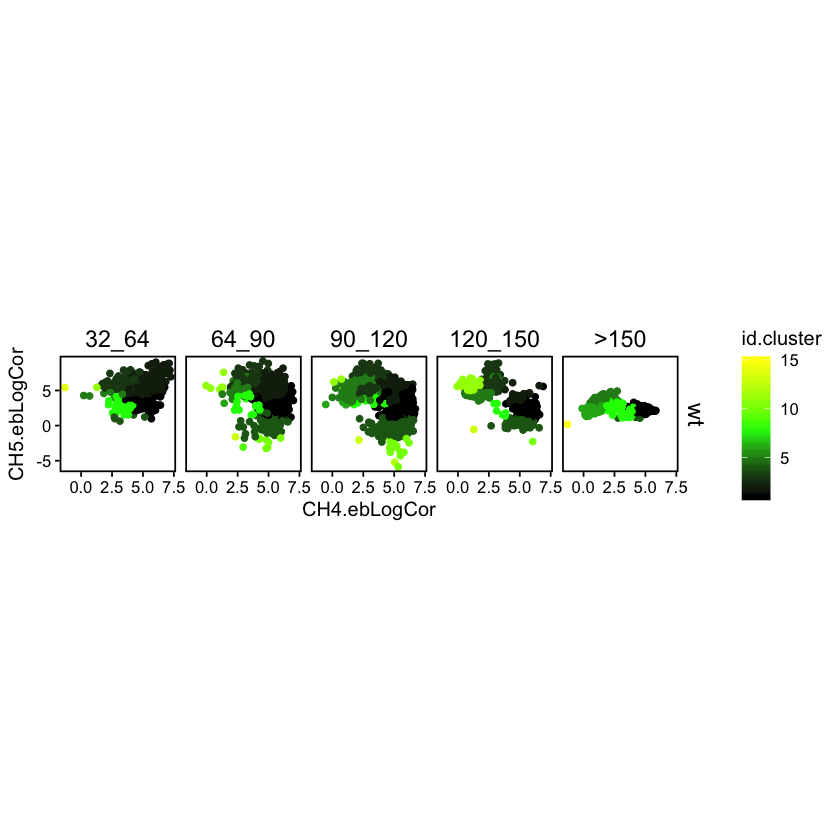

In [24]:
ks <- 4:15
for(k in ks) { 
    # Cut the dataset into k clusters
    icm$id.cluster <- cutree(my.clusters, k)
    # Print a table showing the distribution of the original identities (calculated using K-means) 
    # to the new clusters
    my.table <- table(icm$id.cluster, icm$Identity.km)
    # Print a scatterplot of the ICM data color coded for each cluster made
    my.plot <- ggplot(data = icm, 
                      aes(x = CH4.ebLogCor,  
                          y = CH5.ebLogCor)) +
                 geom_jitter(aes(color = id.cluster)) +
        looks + scale_color_gradient2(low = 'black', mid = 'green',
                                      high = 'yellow', midpoint = (k+1)/2) +
        facet_grid(Genotype1 ~ Stage) + theme(aspect.ratio = 1)
    print(my.plot)
    print(my.table)
}


This dataset has a fairly complicated structure, stemming from the noise in the data acquisition and processing. This aspect has been improved in newer datasets (compare to data from [Morgani et al (2018)](https://doi.org/10.1016/j.ydbio.2018.06.017) and current study). 

Nevertheless, it takes 15 clusters to resolve some of the smaller populations in the Nature Communications data. Even with that, cluster 8 captures a lot of what would be low-NANOG epiblast (NANOG.lo, cluster 6 as well) and a fair amount of PrE cells.

    
       TE  PRE   DP  EPI   DN
  1     0 1026  161    3    9
  2     0   35 1096   25    1
  3     0    0  166  462    0
  4     0  408    0    0   23
  5     0    0    9  292   53
  6     0    0    0    0   82
  7     0    0    1    0    0
  8     0   38    0   16  155
  9     0    0    0    0    1
  10    0   26    0    0    0
  11    0    0    0   61    0
  12    0    1    0    0    0
  13    0    0    0    0    3
  14    0    0    0    1    0
  15    0    0    0    0    1

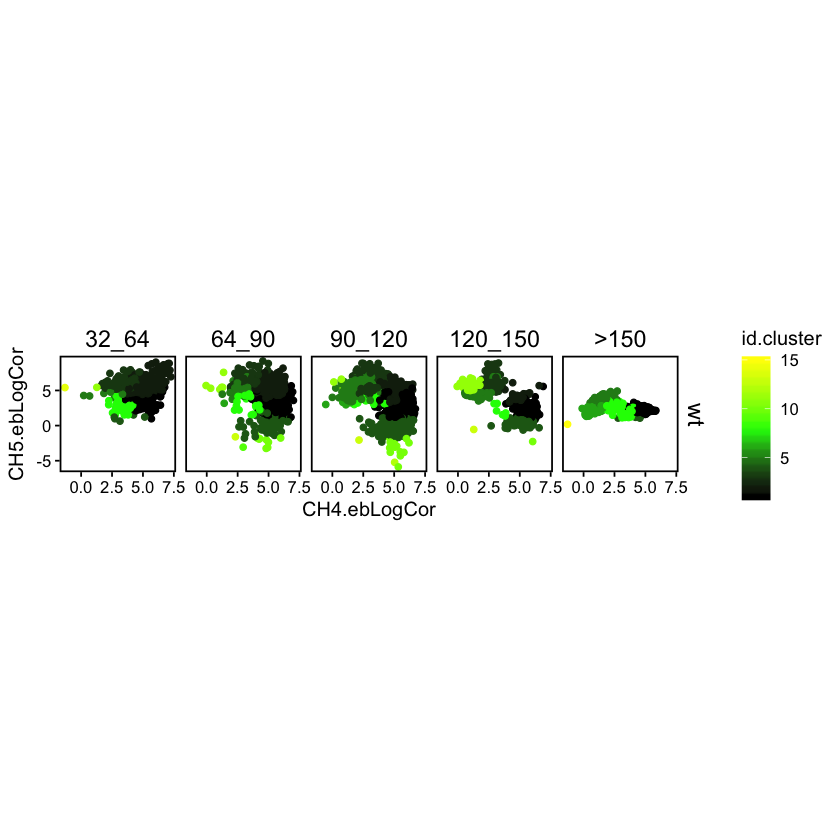

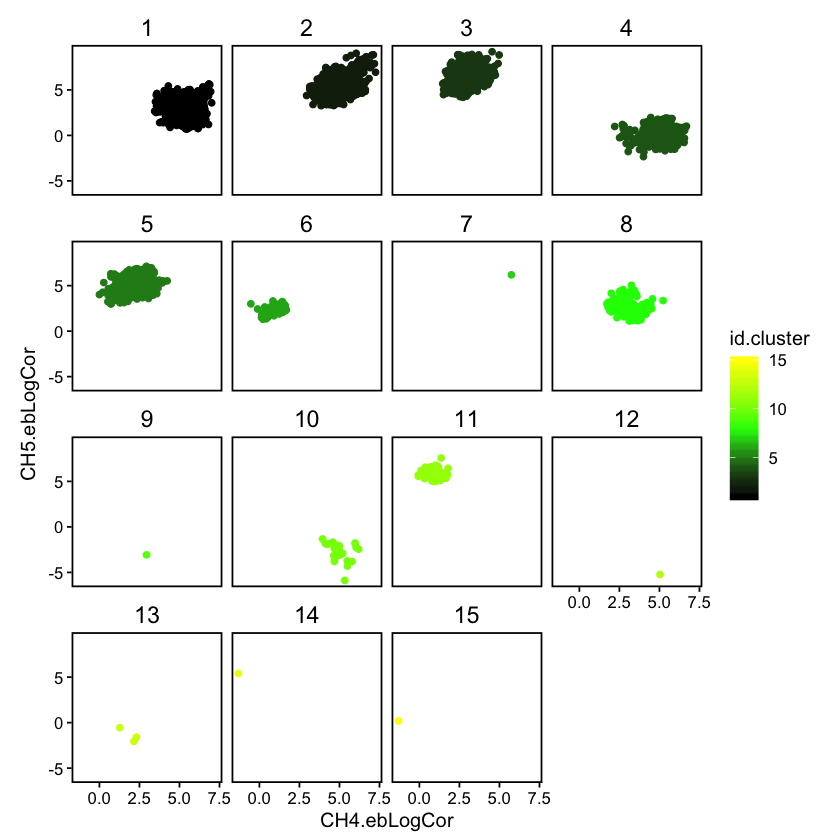

In [25]:
k = 15
icm$id.cluster <- cutree(my.clusters, k)
table(icm$id.cluster, icm$Identity.km)

my.plot <- qplot(CH4.ebLogCor,  CH5.ebLogCor,
                 data = icm, color = id.cluster) +
        looks + scale_color_gradient2(low = 'black', mid = 'green',
                                      high = 'yellow', midpoint = (k+1)/2) +
        facet_grid(Genotype1 ~ Stage) + theme(aspect.ratio = 1)
print(my.plot)

my.plot <- qplot(CH4.ebLogCor,  CH5.ebLogCor,
                 data = icm, color = id.cluster) +
        looks + scale_color_gradient2(low = 'black', mid = 'green',
                                      high = 'yellow', midpoint = (k+1)/2) +
        facet_wrap( ~ id.cluster) + theme(aspect.ratio = 1)
print(my.plot)



Manually assign identities to each cluster and incorporate into ```icm```

In [26]:
# Assing identity to each cluster and combine with icm
idxclust <- data.frame(id.cluster = 1:k, 
                       Identity.hc = c('PRE', 'DP', 'EPI', 
                                       'PRE', 'EPI', 'EPI.lo', 
                                       'DP', 'DN', 'DN', 'PRE', 
                                       'EPI', 'PRE', 'DN', 
                                       'EPI', 'DN'))
icm <- merge(icm, idxclust)

Plot ICM cells now color-coded for the identity assigned using Hierarchical clustering

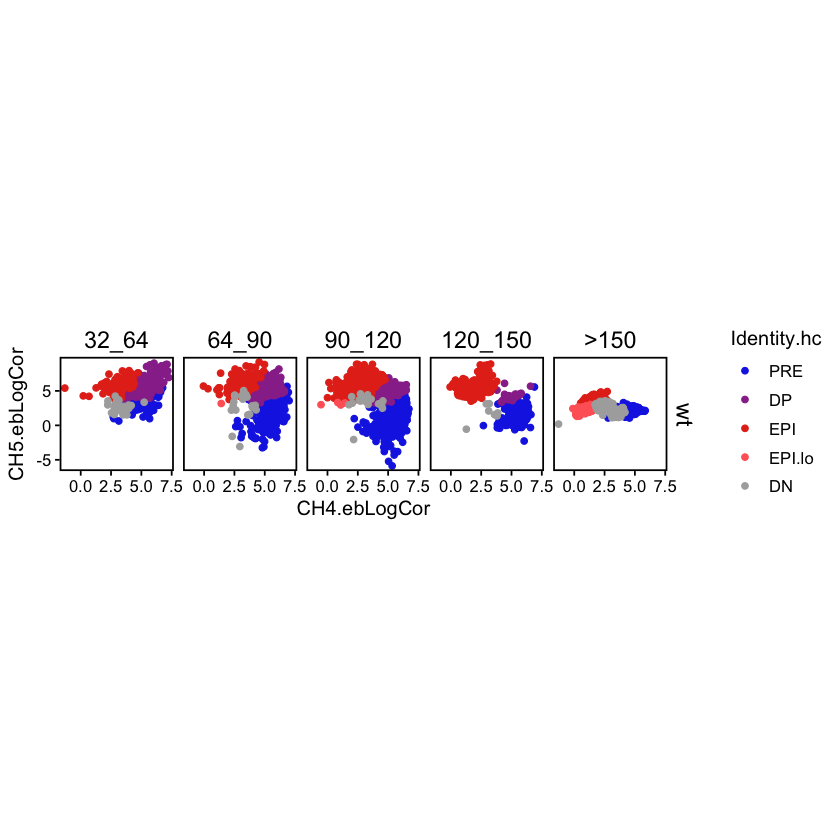

In [27]:
my.plot <- qplot(CH4.ebLogCor,  CH5.ebLogCor,
                 data = icm, color = Identity.hc) +
        looks + scale_color_manual(values = idcols) +
        facet_grid(Genotype1 ~ Stage) + theme(aspect.ratio = 1)
print(my.plot)

Below is the same plot using the original classification, which used K-means Clustering

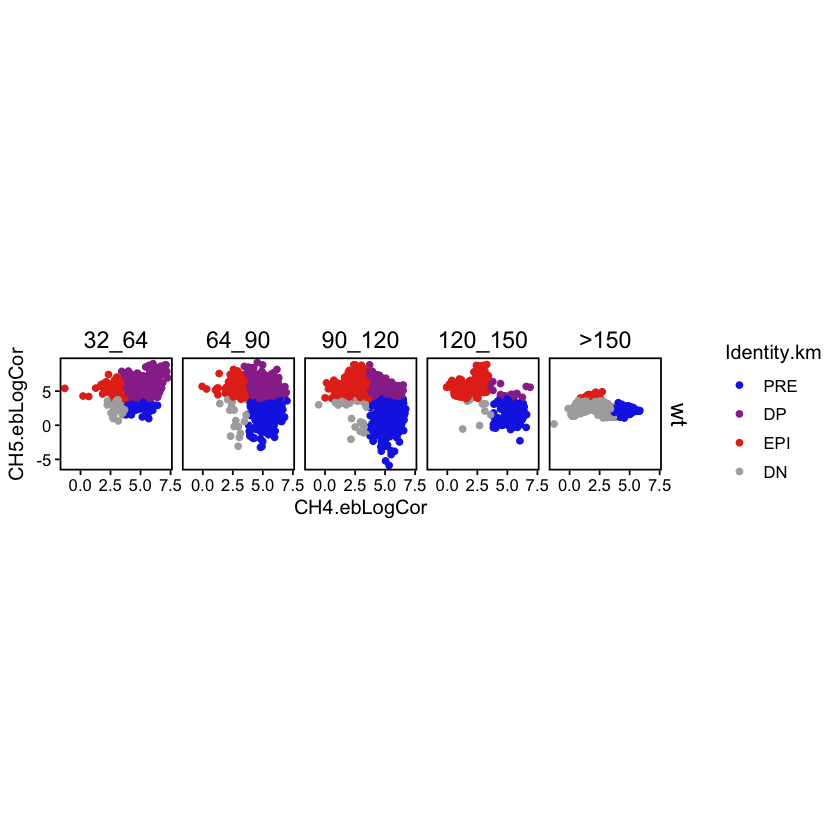

In [28]:
my.plot <- qplot(CH4.ebLogCor,  CH5.ebLogCor,
                 data = icm, color = Identity.km) +
        looks + scale_color_manual(values = idcols) +
        facet_grid(Genotype1 ~ Stage) + theme(aspect.ratio = 1)
print(my.plot)

Unfortunately, neither solution seems necessarily _better_ than the other, which reflects the high degree of noise inherent to this particular dataset and the fact that the clusters do not completely separate.  

However, it stands out that K-means tends to divide the data into roughly four quadrants, which may or may not be what we are after. This is due to the tendency of K-means Clustering to try and find equally-sized clusters. In our case, the size of the clusters changes as embryos develop, so K-means tends to under-estimate the size of the DP compartment at early stages, and over-estimate it at late stages (and vice versa for the DN/NANOG.lo compartments). Therefore, in the present study, we have used Hierarchical Clustering instead of K-means, as we found it produces more realistic results.  

Below are the steps we took for cell classification using this method on the present dataset.